HELLO WORLD

In [11]:
%pip install soundFile matplotlib

You should consider upgrading via the '/home/lleonard/.cache/pypoetry/virtualenvs/sound-visualizer-xBDH8glm-py3.9/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


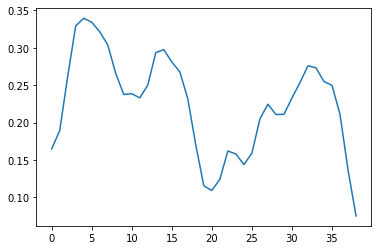

In [12]:
import soundfile as sf
import numpy as np
from matplotlib import pyplot as plt


rms = [np.sqrt(np.mean(block**2)) for block in
       sf.blocks('sounds/BreakingGlass.wav', blocksize=1024, overlap=512)]

plt.plot(rms)